# **Project Name** :- **Fraud_Transaction_Detection**

**Project Type** - **Unsupervised**

**Contribution**  - **Individual**

## **Project Summary :**

The project involves developing a predictive model that can classify transactions as either fraudulent or legitimate. The model is trained on a dataset of historical transactions, which includes features such as transaction amount, location, time of day, and type of transaction.

This project typically involves developing a system that can identify and flag suspicious transactions in real-time, using machine learning and data analytics techniques. The goal is to prevent financial losses due to fraudulent activities, such as credit card fraud or identity theft.

## **GitHub Link** -

https://github.com/AshwiniSuryakar09/Fraud-Transaction-Detection

## **General Guidelines** : -


Well-structured, formatted, and commented code is required.

Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

The additional credits will have advantages over other students during Star Student selection.

    [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
              without a single error logged. ]
Each and every logic should have proper comments.

You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.

# Chart visualization code
Why did you pick the specific chart?
What is/are the insight(s) found from the chart?
Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
You have to create at least 15 logical & meaningful charts having important insights.
[ Hints : - Do the Vizualization in a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis ]

You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.
Explain the ML Model used and it's performance using Evaluation metric Score Chart.
Cross- Validation & Hyperparameter Tuning

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

## **Let's Begin !**

## **1. Know Your Data**

##  Import Libraries

In [1]:
import numpy as np
import pandas as pd

## Dataset Loading

In [2]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
fraud_df =pd.read_csv('Fraud.csv')


## Dataset First View

In [6]:
# Dataset First Look
fraud_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [7]:
fraud_df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1495822,142,CASH_IN,250849.80,C1856627544,3342052.89,3592902.68,C1513085262,281215.46,30365.66,0.0,0.0
1495823,142,CASH_IN,156521.28,C338432845,3592902.68,3749423.96,C160109034,398042.70,241521.42,0.0,0.0
1495824,142,CASH_IN,174139.49,C1343360341,3749423.96,3923563.45,C714821642,869626.13,695486.64,0.0,0.0
1495825,142,CASH_IN,308834.56,C1732104347,3923563.45,4232398.01,C879842,2680392.41,2371557.85,0.0,0.0
1495826,142,CASH_IN,217933.43,C1177504775,4232398.01,4450331.44,C18,NaN,NaN,NaN,NaN


## Dataset Rows & Columns count

In [8]:
# Dataset Rows(Observation) & Columns count(Feature)
print(f'Total observation and feature for restaurant: {fraud_df.shape}')

Total observation and feature for restaurant: (1495827, 11)


## Dataset Information

In [9]:
#Dataset Information
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495827 entries, 0 to 1495826
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1495827 non-null  int64  
 1   type            1495827 non-null  object 
 2   amount          1495827 non-null  float64
 3   nameOrig        1495827 non-null  object 
 4   oldbalanceOrg   1495827 non-null  float64
 5   newbalanceOrig  1495827 non-null  float64
 6   nameDest        1495827 non-null  object 
 7   oldbalanceDest  1495826 non-null  float64
 8   newbalanceDest  1495826 non-null  float64
 9   isFraud         1495826 non-null  float64
 10  isFlaggedFraud  1495826 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 125.5+ MB


## Null Values

In [10]:
# Duplicated Values
fraud_df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,1
newbalanceDest,1
isFraud,1


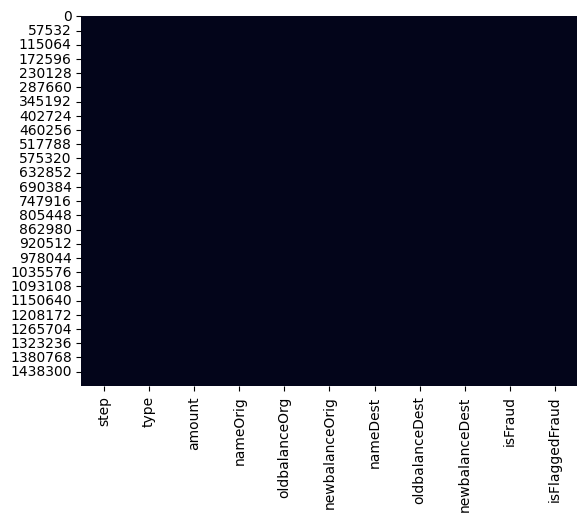

In [11]:
# Visualizing the missing values for hotel
# Checking Null Value by plotting Heatmap
import seaborn as sns
sns.heatmap(fraud_df.isnull(), cbar=False);

## Duplicate values

In [12]:
fraud_df.duplicated().sum()

0

## **What did you know about your dataset?**


* There are 5611398 total observation with 11 different features.
* There is no duplicate values
* Their are some columns which has one null value




## **2. Understanding Your Variables**

In [13]:
# Dataset Describe review
fraud_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
step,1495827.0,NaN,NaN,NaN,58.918546,50.806047,1.0,17.0,38.0,130.0,142.0
type,1495827,5,CASH_OUT,534290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,1495827.0,NaN,NaN,NaN,160946.822823,267551.433549,0.1,13025.985,78269.54,216405.335,10000000.0
nameOrig,1495827,1495303,C1999539787,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceOrg,1495827.0,NaN,NaN,NaN,869182.898375,2955295.655755,0.0,0.0,15297.0,126129.245,38939424.03
newbalanceOrig,1495827.0,NaN,NaN,NaN,890022.431364,2991692.887063,0.0,0.0,0.0,167558.175,38946233.02
nameDest,1495827,636913,C985934102,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceDest,1495826.0,NaN,NaN,NaN,990144.402984,2302902.078563,0.0,0.0,134410.57,937393.1175,42207404.59
newbalanceDest,1495826.0,NaN,NaN,NaN,1115748.635154,2407354.002132,0.0,0.0,225294.035,1153889.1025,42207404.59
isFraud,1495826.0,NaN,NaN,NaN,0.00107,0.032688,0.0,0.0,0.0,0.0,1.0


### **Variables Description**

  1.Step             
  2.Type            
  3.Amount         
  4.NameOrig         
  5.OldbalanceOrg   
  6.NewbalanceOrig  
  7.NameDest         
  8.OldbalanceDest  
  9.NewbalanceDest  
  10.IsFraud         
  11.IsFlaggedFraud

In [14]:
# Check Unique Values for each variable for restaurant
for i in fraud_df.columns.tolist():
  print("No. of unique values in ",i,"is",fraud_df[i].nunique(),".")

No. of unique values in  step is 142 .
No. of unique values in  type is 5 .
No. of unique values in  amount is 1422928 .
No. of unique values in  nameOrig is 1495303 .
No. of unique values in  oldbalanceOrg is 551115 .
No. of unique values in  newbalanceOrig is 654026 .
No. of unique values in  nameDest is 636913 .
No. of unique values in  oldbalanceDest is 862877 .
No. of unique values in  newbalanceDest is 694163 .
No. of unique values in  isFraud is 2 .
No. of unique values in  isFlaggedFraud is 1 .


## **3. Data Wrangling**

In [15]:
#Describe the Dataset
fraud_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.495827e+06,1.495827e+06,1.495827e+06,1.495827e+06,1.495826e+06,1.495826e+06,1.495826e+06,1495826.0
mean,5.891855e+01,1.609468e+05,8.691829e+05,8.900224e+05,9.901444e+05,1.115749e+06,1.069643e-03,0.0
std,5.080605e+01,2.675514e+05,2.955296e+06,2.991693e+06,2.302902e+06,2.407354e+06,3.268791e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.700000e+01,1.302599e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,3.800000e+01,7.826954e+04,1.529700e+04,0.000000e+00,1.344106e+05,2.252940e+05,0.000000e+00,0.0
75%,1.300000e+02,2.164053e+05,1.261292e+05,1.675582e+05,9.373931e+05,1.153889e+06,0.000000e+00,0.0
max,1.420000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.220740e+07,4.220740e+07,1.000000e+00,0.0


In [16]:
# Creating Copy
df = fraud_df.copy()

In [17]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [18]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [19]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1495822,142,CASH_IN,250849.80,C1856627544,3342052.89,3592902.68,C1513085262,281215.46,30365.66,0.0,0.0
1495823,142,CASH_IN,156521.28,C338432845,3592902.68,3749423.96,C160109034,398042.70,241521.42,0.0,0.0
1495824,142,CASH_IN,174139.49,C1343360341,3749423.96,3923563.45,C714821642,869626.13,695486.64,0.0,0.0
1495825,142,CASH_IN,308834.56,C1732104347,3923563.45,4232398.01,C879842,2680392.41,2371557.85,0.0,0.0
1495826,142,CASH_IN,217933.43,C1177504775,4232398.01,4450331.44,C18,NaN,NaN,NaN,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495827 entries, 0 to 1495826
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1495827 non-null  int64  
 1   type            1495827 non-null  object 
 2   amount          1495827 non-null  float64
 3   nameOrig        1495827 non-null  object 
 4   oldbalanceOrg   1495827 non-null  float64
 5   newbalanceOrig  1495827 non-null  float64
 6   nameDest        1495827 non-null  object 
 7   oldbalanceDest  1495826 non-null  float64
 8   newbalanceDest  1495826 non-null  float64
 9   isFraud         1495826 non-null  float64
 10  isFlaggedFraud  1495826 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 125.5+ MB


In [21]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  1494226
Number of Fraud transactions:  1600
Percentage of Legit transactions: 99.8930 %
Percentage of Fraud transactions: 0.1070 %


**These results prove that this is a highly unbalanced data as Percentage of Legit transactions= 99.92 %  and**
**Percentage of Fraud transactions= 0.07 %.**

In [22]:
# Merchants
X = df[df['nameDest'].str.contains('M',na = False)]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0.0,0.0


There is no information regarding the attribites oldbalanceDest and newbalanceDest.

In [23]:
fraud_ratio = df['isFraud'].value_counts()/len(df)
flaggedFraud_ratio =  df['isFlaggedFraud'].value_counts()/len(df)

In [24]:
print(f'Fraud ratio \n{fraud_ratio} \n\nFlagged fraud ratio \n{flaggedFraud_ratio}')

Fraud ratio 
isFraud
0.0    0.99893
1.0    0.00107
Name: count, dtype: float64 

Flagged fraud ratio 
isFlaggedFraud
0.0    0.999999
Name: count, dtype: float64


In [25]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [26]:
fraudby_type = df.groupby(['type', 'isFraud']).size().unstack(fill_value=0)
flaggedFraudby_type = df[df['isFlaggedFraud']==1].groupby('type')['isFlaggedFraud'].count()

In [27]:
print(f'Fraud per transaction type: \n{fraudby_type}\n \nFlagged fraud per transaction type: \n{flaggedFraudby_type}')

Fraud per transaction type: 
isFraud      0.0  1.0
type                 
CASH_IN   327985    0
CASH_OUT  533483  807
DEBIT       9928    0
PAYMENT   500029    0
TRANSFER  122801  793
 
Flagged fraud per transaction type: 
Series([], Name: isFlaggedFraud, dtype: int64)


**Fraud** :--

In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

**Analyze fraud data**

In [28]:
df[df['isFraud']==1].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1600.000000,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1600.0,1600.0
mean,68.131875,1.240870e+06,1.272853e+06,3.763326e+04,4.724490e+05,1.113738e+06,1.0,0.0
std,39.368953,2.044784e+06,2.260358e+06,5.176480e+05,1.770940e+06,2.517209e+06,0.0,0.0
min,1.000000,1.190000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0
25%,36.000000,9.979390e+04,9.273539e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0
50%,66.000000,3.798780e+05,3.751419e+05,0.000000e+00,0.000000e+00,1.074272e+04,1.0,0.0
75%,101.000000,1.399637e+06,1.399637e+06,0.000000e+00,1.739402e+05,1.007559e+06,1.0,0.0
max,142.000000,1.000000e+07,1.988782e+07,9.887819e+06,3.296166e+07,3.464570e+07,1.0,0.0


In [29]:
len(df[(df['amount'] == df['oldbalanceOrg'])])

1563

In [30]:
len(df[(df['amount'] == df['oldbalanceOrg']) & (df['isFraud'] == 1)] )

1563

So all transactions that empty funds are marked as fraud.
But, there are 4311 fraud transactions in total.

=> Remaining transactions could be outliers?

In [31]:
df_outliers = df[(df['amount'] != df['oldbalanceOrg']) & (df['isFraud'] == 1)]

In [32]:
df_outliers.groupby('type')['type'].count()

,type
type,
CASH_OUT,20
TRANSFER,17


In [33]:
df_outliers[df_outliers['type'] == 'CASH_OUT'].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01,2.000000e+01,20.0,20.0
mean,19.300000,225694.632000,21289.579000,14938.380500,6.715588e+05,1.378360e+06,1.0,0.0
std,11.752267,167589.613731,77088.597703,66806.468544,1.795899e+06,2.589238e+06,0.0,0.0
min,1.000000,23292.300000,0.000000,0.000000,0.000000e+00,9.542832e+04,1.0,0.0
25%,12.000000,108067.740000,0.000000,0.000000,0.000000e+00,2.172305e+05,1.0,0.0
50%,17.500000,165698.385000,0.000000,0.000000,2.316743e+04,4.113313e+05,1.0,0.0
75%,25.250000,337440.130000,0.000000,0.000000,3.940063e+05,8.374597e+05,1.0,0.0
max,38.000000,577418.980000,340830.430000,298767.610000,7.962205e+06,9.291620e+06,1.0,0.0


Seems like most of the fraud cashout outliers are transactions in which Original account has 0 balance before and after the transaction; and Destination account has balance in the order of 10^5 after the transaction.

Outlier shows a pattern and thus cannot be ignored.

In [34]:
df_outliers[df_outliers['type'] == 'TRANSFER'].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,17.000000,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.0,17.0
mean,58.235294,6.807554e+06,1.005814e+07,3.524379e+06,2.586854e+05,5.352975e+05,1.0,0.0
std,45.361781,4.472615e+06,7.914093e+06,3.703736e+06,5.813749e+05,9.711163e+05,0.0,0.0
min,4.000000,1.231949e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0
25%,13.000000,1.395851e+06,7.946645e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0
50%,47.000000,1.000000e+07,1.186101e+07,1.861008e+06,0.000000e+00,0.000000e+00,1.0,0.0
75%,86.000000,1.000000e+07,1.747673e+07,7.476726e+06,1.948128e+05,6.657437e+05,1.0,0.0
max,134.000000,1.000000e+07,1.988782e+07,9.887819e+06,2.122337e+06,3.217684e+06,1.0,0.0



Here also, the outliers cannot be ignored because they show a pattern.

Most of the transfers attempted to transfer an amount of  1 * 10^7
 to an empty Destination account and failed.

**Flagged fraud**

An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.
Analyzing flagged fraud data

In [35]:
df[df['isFlaggedFraud'] == 1].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
len(df[  (df['oldbalanceOrg'] == df['newbalanceOrig']) \
       & (df['oldbalanceDest'] == df['newbalanceDest']) \
       & (df['amount']>200.000) \
       & (df['type']=='TRANSFER') ])

5

In [37]:
len(df[df['isFlaggedFraud'] == 1])

0

9 - 4 = 5 missing values or outliers in isFlaggedFraud.

In [38]:
dff_outliers = df[  (df['oldbalanceOrg'] == df['newbalanceOrig']) \
       & (df['oldbalanceDest'] == df['newbalanceDest']) \
       & (df['amount']>200.000) \
       & (df['type']=='TRANSFER') \
       & (df['isFlaggedFraud']==0)]
dff_outliers.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,5.00000,5.000000,5.0,5.0,5.0,5.0,5.0,5.0
mean,16.80000,237475.474000,0.0,0.0,0.0,0.0,0.0,0.0
std,16.11521,161578.156092,0.0,0.0,0.0,0.0,0.0,0.0
min,1.00000,18931.590000,0.0,0.0,0.0,0.0,0.0,0.0
25%,12.00000,133711.480000,0.0,0.0,0.0,0.0,0.0,0.0
50%,12.00000,271161.740000,0.0,0.0,0.0,0.0,0.0,0.0
75%,15.00000,342317.150000,0.0,0.0,0.0,0.0,0.0,0.0
max,44.00000,421255.410000,0.0,0.0,0.0,0.0,0.0,0.0


Failed transfer attempts from empty accounts are not flagged as fraud.
Again, the outliers has a pattern and must be retained.

In [39]:
# Drop some columns
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495827 entries, 0 to 1495826
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1495827 non-null  int64  
 1   type            1495827 non-null  object 
 2   amount          1495827 non-null  float64
 3   oldbalanceOrg   1495827 non-null  float64
 4   newbalanceOrig  1495827 non-null  float64
 5   oldbalanceDest  1495826 non-null  float64
 6   newbalanceDest  1495826 non-null  float64
 7   isFraud         1495826 non-null  float64
 8   isFlaggedFraud  1495826 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 102.7+ MB


In [41]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.495827e+06,1.495827e+06,1.495827e+06,1.495827e+06,1.495826e+06,1.495826e+06,1.495826e+06,1495826.0
mean,5.891855e+01,1.609468e+05,8.691829e+05,8.900224e+05,9.901444e+05,1.115749e+06,1.069643e-03,0.0
std,5.080605e+01,2.675514e+05,2.955296e+06,2.991693e+06,2.302902e+06,2.407354e+06,3.268791e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.700000e+01,1.302599e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,3.800000e+01,7.826954e+04,1.529700e+04,0.000000e+00,1.344106e+05,2.252940e+05,0.000000e+00,0.0
75%,1.300000e+02,2.164053e+05,1.261292e+05,1.675582e+05,9.373931e+05,1.153889e+06,0.000000e+00,0.0
max,1.420000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.220740e+07,4.220740e+07,1.000000e+00,0.0


Values of columns step, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest vary by a very large scale. So we can apply mean normalization.

In [42]:
cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df['step'] = df['step'] - df['step'].mean() / (df['step'].std())
df[cols] = df[cols].apply(lambda x: (np.log(x+10)))

In [43]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,-0.159676,PAYMENT,9.195190,12.044412,11.984842,2.302585,2.302585,0.0,0.0
1,-0.159676,PAYMENT,7.535980,9.964536,9.872756,2.302585,2.302585,0.0,0.0
2,-0.159676,TRANSFER,5.252273,5.252273,2.302585,2.302585,2.302585,1.0,0.0
3,-0.159676,CASH_OUT,5.252273,5.252273,2.302585,9.961379,2.302585,1.0,0.0
4,-0.159676,PAYMENT,9.365474,10.634990,10.305475,2.302585,2.302585,0.0,0.0


In [44]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.495827e+06,1.495827e+06,1.495827e+06,1.495827e+06,1.495826e+06,1.495826e+06,1.495826e+06,1495826.0
mean,5.775887e+01,1.084656e+01,8.250800e+00,6.774793e+00,8.747438e+00,9.216665e+00,1.069643e-03,0.0
std,5.080605e+01,1.812302e+00,4.728427e+00,5.271430e+00,5.589415e+00,5.580757e+00,3.268791e-02,0.0
min,-1.596759e-01,2.312535e+00,2.302585e+00,2.302585e+00,2.302585e+00,2.302585e+00,0.000000e+00,0.0
25%,1.584032e+01,9.475469e+00,2.302585e+00,2.302585e+00,2.302585e+00,2.302585e+00,0.000000e+00,0.0
50%,3.684032e+01,1.126804e+01,9.636066e+00,2.302585e+00,1.180873e+01,1.232521e+01,0.000000e+00,0.0
75%,1.288403e+02,1.228495e+01,1.174514e+01,1.202915e+01,1.375087e+01,1.395866e+01,0.000000e+00,0.0
max,1.408403e+02,1.611810e+01,1.747752e+01,1.747769e+01,1.755811e+01,1.755811e+01,1.000000e+00,0.0


**Let's make df2 that ignores transaction types other than transfers and cash outs.**

In [45]:
df2 = df[(df['type'].isin(['CASH_OUT', 'TRANSFER']))].copy(deep=True)

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657884 entries, 2 to 1495801
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            657884 non-null  float64
 1   type            657884 non-null  object 
 2   amount          657884 non-null  float64
 3   oldbalanceOrg   657884 non-null  float64
 4   newbalanceOrig  657884 non-null  float64
 5   oldbalanceDest  657884 non-null  float64
 6   newbalanceDest  657884 non-null  float64
 7   isFraud         657884 non-null  float64
 8   isFlaggedFraud  657884 non-null  float64
dtypes: float64(8), object(1)
memory usage: 50.2+ MB


In [47]:
df2['step'] = df2['step'] - df2['step'].mean() / (df2['step'].std())

In [48]:
df2.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,657884.000000,657884.000000,657884.000000,657884.000000,657884.000000,657884.000000,657884.000000,657884.0
mean,56.751466,11.947032,6.396489,3.224143,11.907753,13.468001,0.002432,0.0
std,50.939742,1.183061,4.163481,2.768504,4.053092,1.935776,0.049256,0.0
min,-1.296075,2.338917,2.302585,2.302585,2.302585,2.302585,0.000000,0.0
25%,14.703925,11.372877,2.302585,2.302585,11.740536,12.738977,0.000000,0.0
50%,35.703925,12.094890,5.700444,2.302585,13.228920,13.672336,0.000000,0.0
75%,128.703925,12.671535,10.373016,2.302585,14.331057,14.562947,0.000000,0.0
max,139.703925,16.118097,16.805618,16.439894,17.557200,17.558106,1.000000,0.0


## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

In [49]:
# Data Visualization Libraries

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

**Chart - 1**

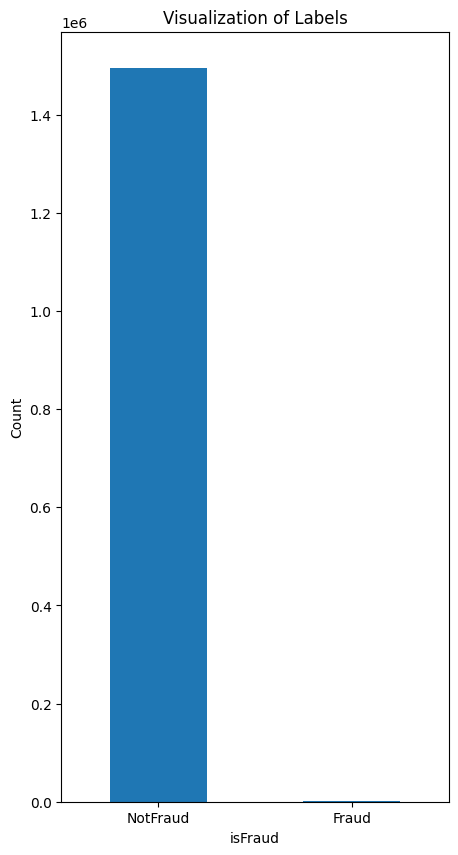

In [50]:
# visualization code
plt.figure(figsize=(5,10))
labels = ["NotFraud", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

**Chart 2 :-**

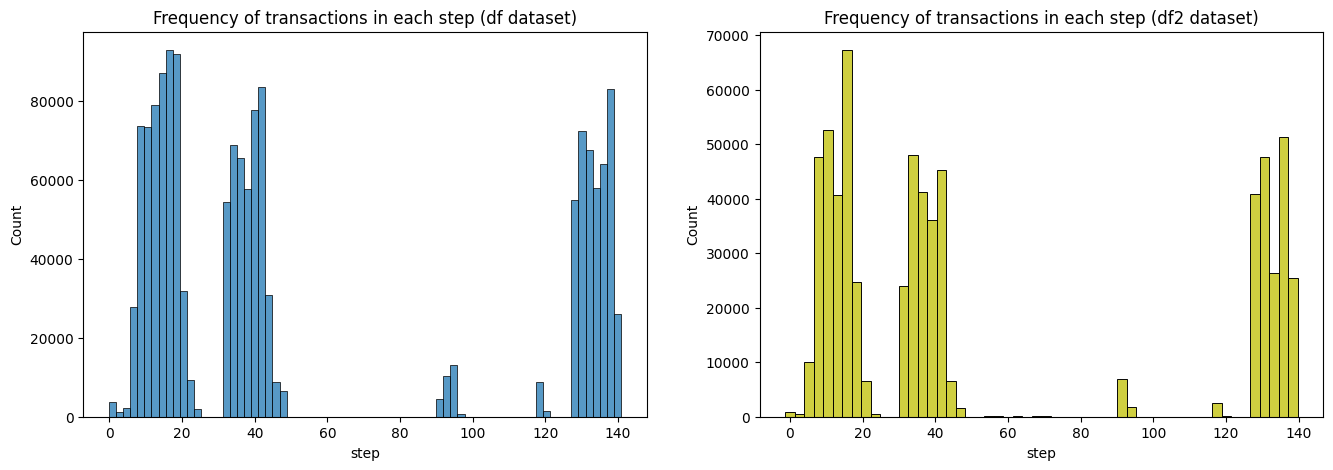

In [51]:
# Chart 2
plt.rcParams['figure.figsize'] =(16, 5)
plt.subplot(1, 2, 1)
sns.histplot(df.step)
plt.title('Frequency of transactions in each step (df dataset)', fontsize = 12)
plt.subplot(1, 2, 2)
sns.histplot(df2.step,color='y')
plt.title('Frequency of transactions in each step (df2 dataset)', fontsize = 12)
plt.show()

**Chart 3 -**

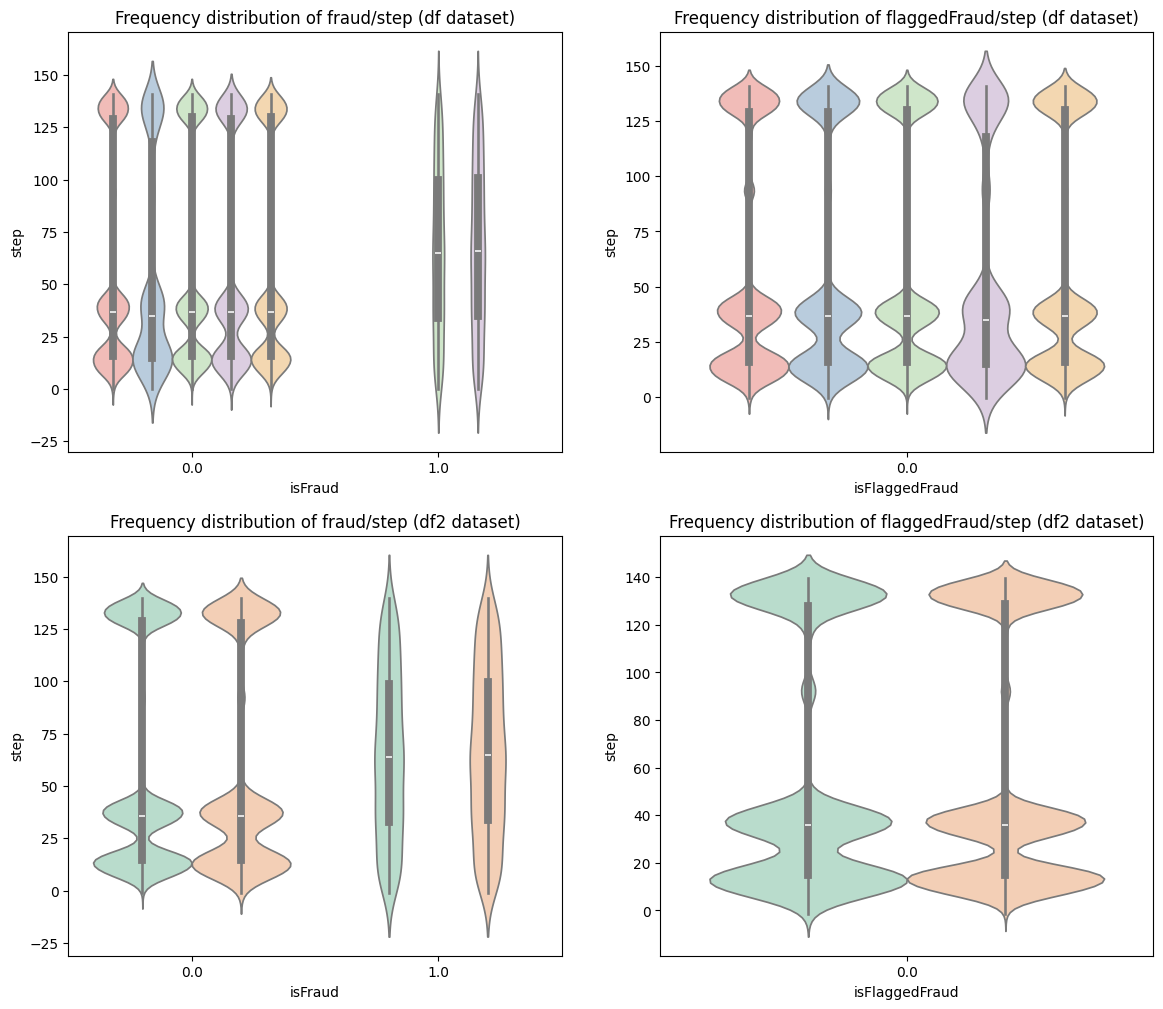

In [52]:
# Chart 3 :--
plt.rcParams['figure.figsize'] =(14, 12)

plt.subplot(2, 2, 1)
sns.violinplot(x='isFraud',y='step',data=df,hue = 'type', palette='Pastel1',legend = False)
plt.title('Frequency distribution of fraud/step (df dataset)', fontsize = 12)

plt.subplot(2, 2, 2)
sns.violinplot(x='isFlaggedFraud',y='step',data=df,hue = 'type', palette='Pastel1',legend= False)
plt.title('Frequency distribution of flaggedFraud/step (df dataset)', fontsize = 12)

plt.subplot(2, 2, 3)
sns.violinplot(x='isFraud',y='step',data=df2,hue = 'type', palette='Pastel2',legend= False)
plt.title('Frequency distribution of fraud/step (df2 dataset)', fontsize = 12)

plt.subplot(2, 2, 4)
sns.violinplot(x='isFlaggedFraud',y='step',data=df2,hue = 'type', palette='Pastel2',legend = False)
plt.title('Frequency distribution of flaggedFraud/step (df2 dataset)', fontsize = 12)

plt.show()

**Chart 4 -**

<Axes: >

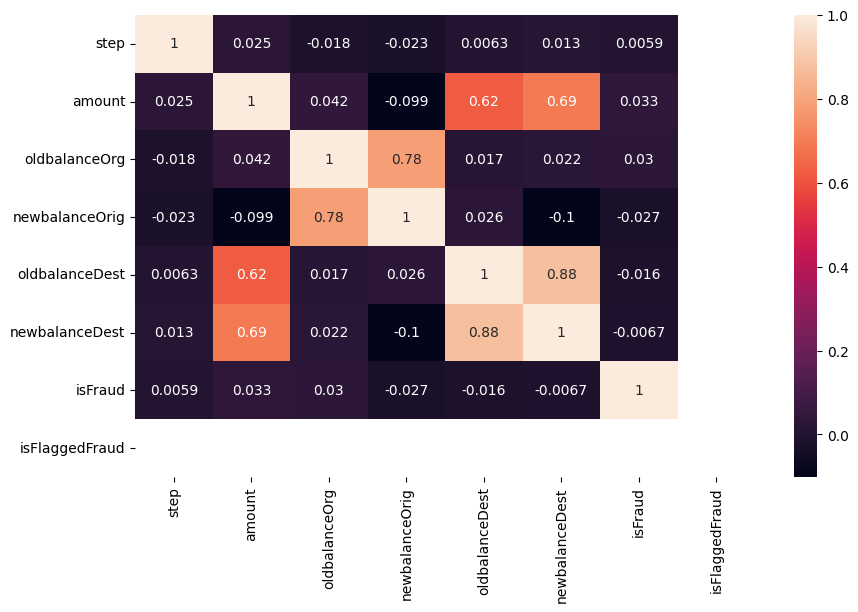

In [53]:
numerical_df = df.select_dtypes(include=['number'])
corr=numerical_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

## **5. Feature Engineering & Data Pre-processing**

In [54]:
#creating a copy of original dataset to train and test models
new_df=df.copy()
new_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,-0.159676,PAYMENT,9.195190,12.044412,11.984842,2.302585,2.302585,0.0,0.0
1,-0.159676,PAYMENT,7.535980,9.964536,9.872756,2.302585,2.302585,0.0,0.0
2,-0.159676,TRANSFER,5.252273,5.252273,2.302585,2.302585,2.302585,1.0,0.0
3,-0.159676,CASH_OUT,5.252273,5.252273,2.302585,9.961379,2.302585,1.0,0.0
4,-0.159676,PAYMENT,9.365474,10.634990,10.305475,2.302585,2.302585,0.0,0.0


In [55]:
# Checking how many attributes are dtype: object

object_List = new_df.select_dtypes(include = "object").columns
print (object_List)

Index(['type'], dtype='object')


THERE ARE 1 ATTRIBUTE WITH Object Datatype. THUS WE NEED TO LABEL ENCODE THEM IN ORDER TO CHECK MULTICOLINEARITY.

In [56]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feat in object_List:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495827 entries, 0 to 1495826
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1495827 non-null  float64
 1   type            1495827 non-null  int64  
 2   amount          1495827 non-null  float64
 3   oldbalanceOrg   1495827 non-null  float64
 4   newbalanceOrig  1495827 non-null  float64
 5   oldbalanceDest  1495826 non-null  float64
 6   newbalanceDest  1495826 non-null  float64
 7   isFraud         1495826 non-null  float64
 8   isFlaggedFraud  1495826 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 102.7 MB
None


In [57]:
new_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,-0.159676,3,9.195190,12.044412,11.984842,2.302585,2.302585,0.0,0.0
1,-0.159676,3,7.535980,9.964536,9.872756,2.302585,2.302585,0.0,0.0
2,-0.159676,4,5.252273,5.252273,2.302585,2.302585,2.302585,1.0,0.0
3,-0.159676,1,5.252273,5.252273,2.302585,9.961379,2.302585,1.0,0.0
4,-0.159676,3,9.365474,10.634990,10.305475,2.302585,2.302585,0.0,0.0


**MULTICOLINEARITY**

In [58]:
# Import library for VIF (VARIANCE INFLATION FACTOR)
!pip install statsmodels
import statsmodels.api as sm
import pandas as pd

In [59]:
# Import library for VIF (VARIANCE INFLATION FACTOR)
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    # Replace infinite values with naN
    df = df.replace([np.inf, -np.inf],np.nan)
    # drop rows with NaN
    df = df.dropna()
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)
calc_vif(new_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,step,2.259647
1,type,3.504290
2,amount,21.685975
3,oldbalanceOrg,12.344978
4,newbalanceOrig,8.881109
5,oldbalanceDest,17.849699
6,newbalanceDest,21.937784
7,isFraud,1.009906
8,isFlaggedFraud,NaN


<Axes: >

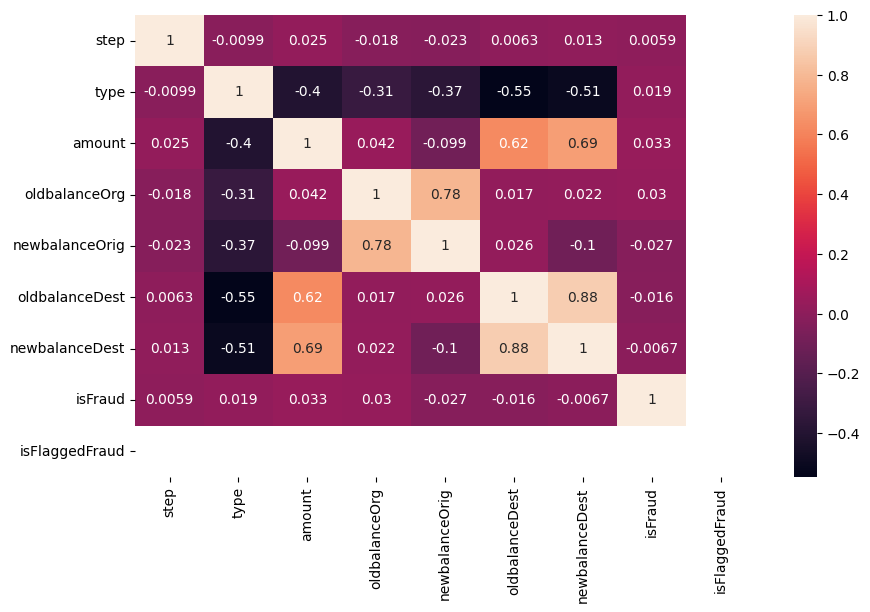

In [60]:
!pip install matplotlib
import matplotlib.pyplot as plt # imports the matplotlib.pyplot module
import seaborn as sns
corr=new_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

### **Handling Imbalanced Dataset**

We had noted that the dataset is highly imbalanced.

In [61]:
print(f'Fraud ratio \n{fraud_ratio} \n\nFlagged fraud ratio \n{flaggedFraud_ratio}')

Fraud ratio 
isFraud
0.0    0.99893
1.0    0.00107
Name: count, dtype: float64 

Flagged fraud ratio 
isFlaggedFraud
0.0    0.999999
Name: count, dtype: float64


In [62]:
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline # Use Pipeline from imblearn
from imblearn.over_sampling import SMOTE

In [63]:
X = df
Y = df['isFraud']          # target label
X = pd.concat([X, pd.get_dummies(X['type'])], axis = 'columns')       # one-hot columns for transaction type
X = X.drop(['isFraud', 'type'], axis=1)
X2 = df2
Y2 = df2['isFraud']
X2 = pd.concat([X2, pd.get_dummies(X2['type'])], axis = 'columns')
X2 = X2.drop(['isFraud', 'type'], axis=1)

In [71]:
# Impute missing values in X and Y
imputer = SimpleImputer(strategy='mean') # Use SimpleImputer from sklearn
smote = SMOTE()
pipeline = Pipeline([
    ('imputer', imputer),
    ('smote', smote)
])

# Fit and transform on X and Y
# The pipeline will first impute missing values and then apply SMOTE
X_resampled, Y_resampled = pipeline.fit_resample(X, Y.fillna(0))

# You no longer need to handle missing values in Y separately

In [72]:
len(X), len(X2)

(1495827, 657884)

In [73]:
# SMOTE resampling
# Impute NaN values with 0
Y.fillna(0, inplace=True)
Y2.fillna(0, inplace=True)

In [74]:
list(Y).count(1), list(Y2).count(1)

(1600, 1600)

**Model Training**

In [75]:
# Perform Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

In [77]:
# Split the data
from sklearn.model_selection import train_test_split
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (1047078, 8)
Shape of X_test:  (448749, 8)


## **6. ML Model Implementation**

In [79]:
# Check for missing values in Y_train
!pip install pandas
import pandas as pd
print(Y_train.isnull().sum())

# Handle missing values (example: replace with the most frequent value)
!pip install scikit-learn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
Y_train = imputer.fit_transform(Y_train.values.reshape(-1, 1))

1


**## 1. DECISION TREE**

In [80]:
# DECISION TREE Model Implementation

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [81]:
# Evaluation for Decision Tree
print("Decision Tree Score: ", decision_tree_score)

Decision Tree Score:  99.95676870589126


In [83]:
# Handle missing values in X_train (example: replace with the mean)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # Use an appropriate strategy
X_train = imputer.fit_transform(X_train)

# RANDOM FOREST Model Implementation
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [84]:
# Evaluation for Random Forest
print("Random Forest Score: ", random_forest_score)

Random Forest Score:  99.97214478472375


In [86]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
# import the function confusion_matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 378
False Positives: 77
True Negatives: 448177
False Negatives: 117
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 376
False Positives: 6
True Negatives: 448248
False Negatives: 119


TP(Decision Tree) ~ TP(Random Forest) so no competetion here.
FP(Decision Tree) >> FP(Random Forest) - Random Forest has an edge
TN(Decision Tree) < TN(Random Forest) - Random Forest is better here too
FN(Decision Tree) ~ FN(Random Forest)

In [87]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[448177     77]
 [   117    378]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[448248      6]
 [   119    376]]


In [89]:
# classification report - DT
from sklearn.metrics import classification_report
classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    448254
         1.0       0.83      0.76      0.80       495

    accuracy                           1.00    448749
   macro avg       0.92      0.88      0.90    448749
weighted avg       1.00      1.00      1.00    448749

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    448254
         1.0       0.98      0.76      0.86       495

    accuracy                           1.00    448749
   macro avg       0.99      0.88      0.93    448749
weighted avg       1.00      1.00      1.00    448749



With Such a good precision and hence F1-Score, Random Forest comes out to be better as expected.

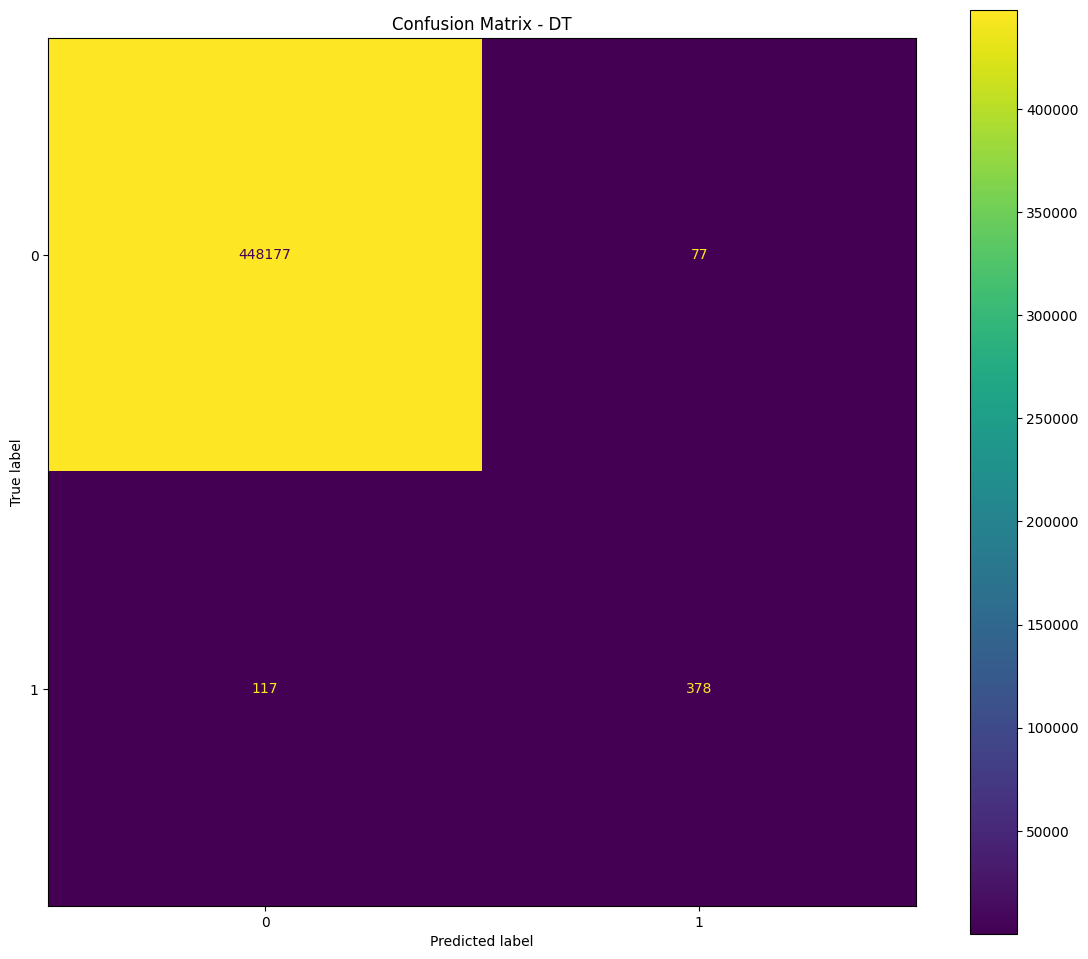

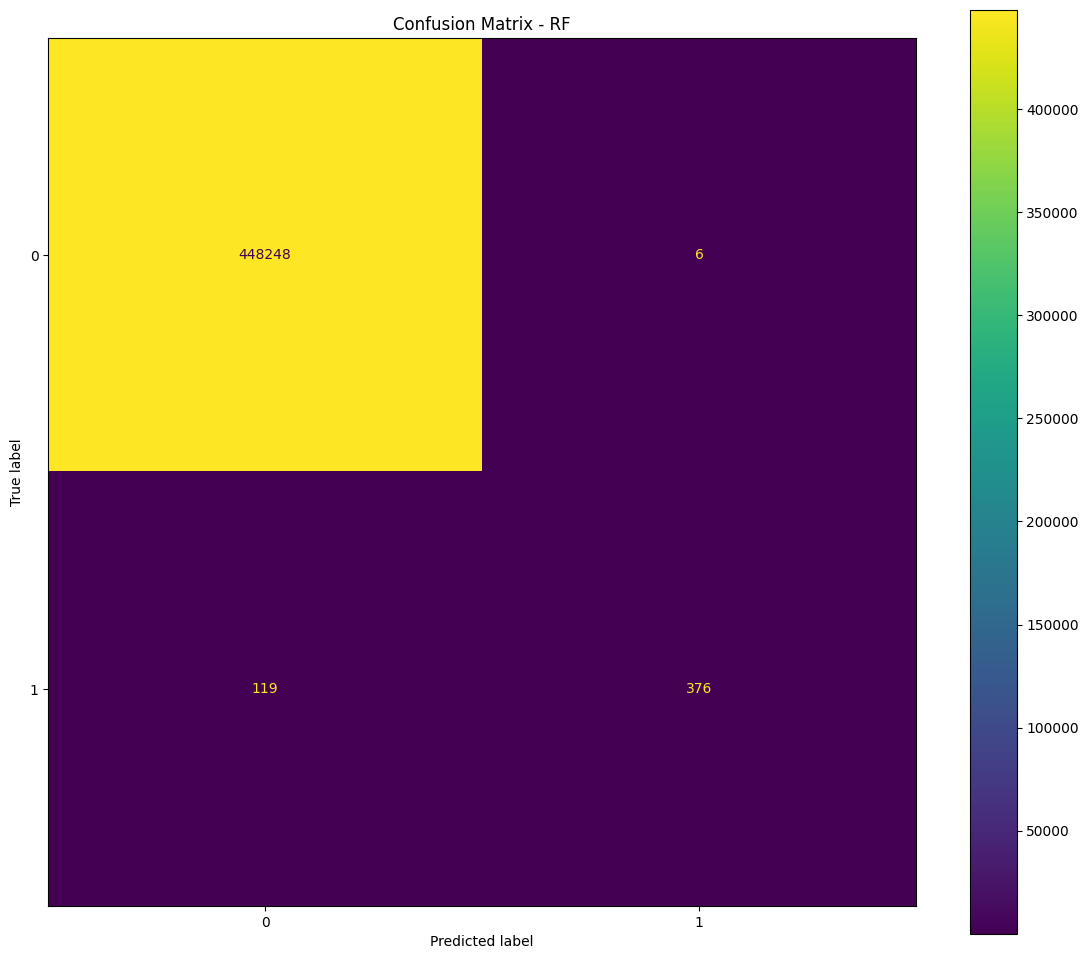

In [91]:
# visualising confusion matrix - DT
from sklearn.metrics import ConfusionMatrixDisplay # import the class
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

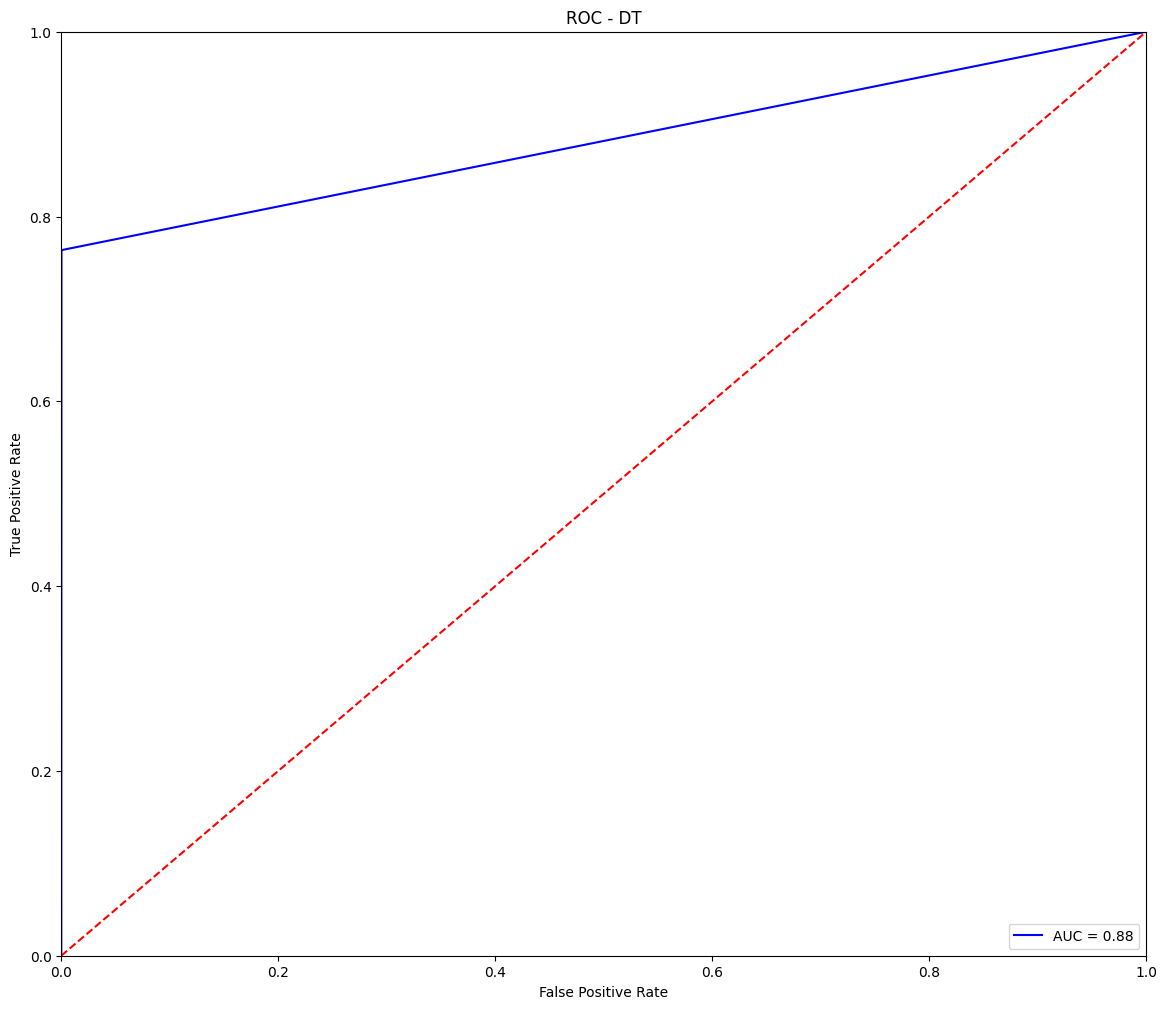

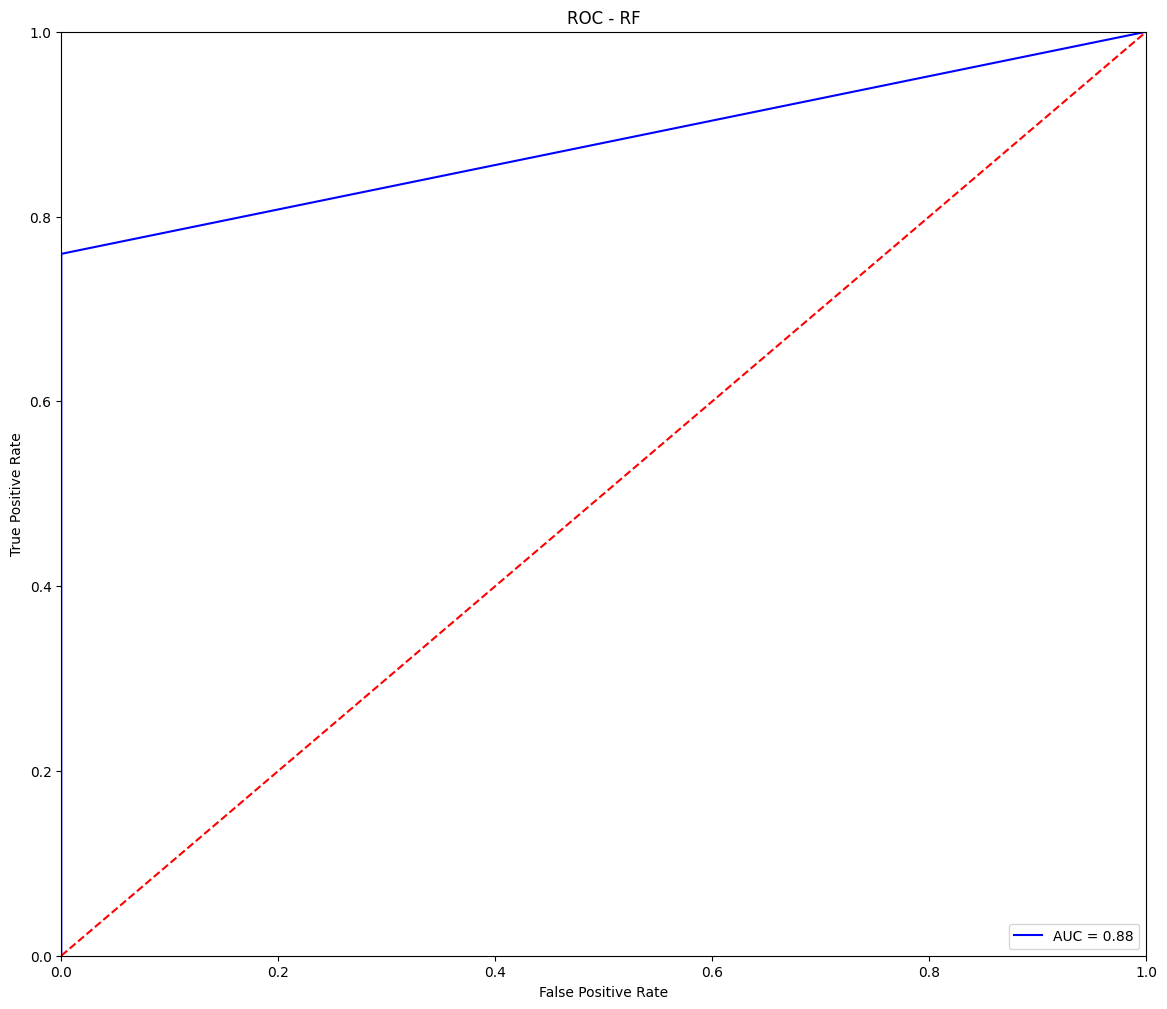

In [93]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


**THE AUC for both Decision Tree and Random Forest is equal, so both models are pretty good at what they do.**

## **7. CONCLUSION** :

We have seen that Accuracy of both Random Forest and Decision Tree is equal, although teh precision of Random Forest is more. In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legit to be left off.If either of the 2 reasons are not fulfiiled we may catch the innocent and leave the culprit.
This is also one of the reason why Random Forest and Decision Tree are used unstead of other algorithms.


Also the reason I have chosen this model is because of highly unbalanced dataset (Legit: Fraud :: 99.87:0.13). Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data in a simpler way since Decision Tree makes decisions in a boolean way.


Models like XGBoost, Bagging, ANN, and Logistic Regression may give good accuracy but they won't give good precision and recall values.

**What are the key factors that predict fraudulent customer?**

1.The source of request is secured or not ?

2.Is the name of organisation asking for money is legit or not ?

3.Transaction history of vendors.

**What kind of prevention should be adopted while company update its infrastructure?**

1.Use smart vertified apps only.

2.Browse through secured websites.

3.Use secured internet connections (USE VPN).

4.Keep your mobile and laptop security updated.

5.Don't respond to unsolicited calls/SMS(s/E-mails).

6.If you feel like you have been tricked or security compromised, contact your bank immidiately.

**Assuming these actions have been implemented, how would you determine if they work?**

1.Bank sending E-statements.

2.Customers keeping a check of their account activity.

3.Always keep a log of your payments.